# Linear Regression (OLS)

### Key Equation: $Ax =b ~~ \text{for} ~~ n \times p+1 $


Linear regression - Ordinary Least Square (OLS) is the most basic form of supervised learning. In this we have a target variable (y) and we want to establish a linear relationship with a set of features (x<sub>1</sub>, x<sub>2</sub>, x<sub>3</sub>, ...)

Lets take a simple example to illustrate this problem:

We have price ('000 INR) and mileage (kmpl) for 7 hatchback cars as below

```
price = [199 , 248 , 302 , 363 , 418 , 462 , 523 ]
kmpl  = [23.9, 22.7, 21.1, 20.5, 19.8, 20.4, 18.6]
```

We want to predict the target variable `price`, given the input variable `kmpl`

In [76]:
import numpy as np

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10, 6)

import ipywidgets as widgets
from ipywidgets import interact, interactive

In [78]:
price = np.array([199, 248, 302, 363, 418, 462, 523])

In [79]:
kmpl = np.array([23.9, 22.7, 21.1, 20.5, 19.8, 20.4, 18.6])

Text(0, 0.5, 'price')

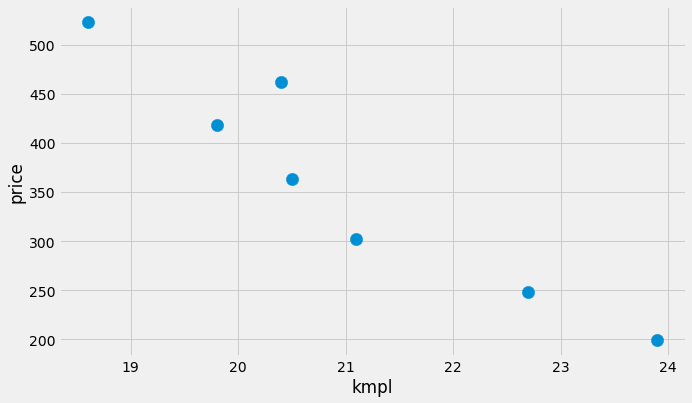

In [80]:
plt.scatter(kmpl, price, s = 150)
plt.xlabel('kmpl')
plt.ylabel('price')

## Thinking Linear Algebra Way

The basic problem in linear regression is solving - `n` linear equation, with `p` unknowns, where `p < n`

So a linear relationship can be written as:

$$ price = \beta_{0} + \beta_{1} kmpl $$

We have added an intercept to the equation, so that the line does not need to pass through zero

So we are trying to solve these n = 7 equations with, p = 2

$$ 199 = \beta_{0} + \beta_{1} 23.9 ~~~~ \text{(eq 1)} $$
$$ 248 = \beta_{0} + \beta_{1} 22.7 ~~~~ \text{(eq 2)} $$
$$ 302 = \beta_{0} + \beta_{1} 21.1 ~~~~ \text{(eq 3)} $$
$$ 363 = \beta_{0} + \beta_{1} 20.5 ~~~~ \text{(eq 4)} $$
$$ 418 = \beta_{0} + \beta_{1} 19.8 ~~~~ \text{(eq 5)} $$
$$ 462 = \beta_{0} + \beta_{1} 20.4 ~~~~ \text{(eq 6)} $$
$$ 523 = \beta_{0} + \beta_{1} 18.6 ~~~~ \text{(eq 7)} $$

So the key to remember here is that we are solving for $\beta_{0}$ and $ \beta_{1} $

Now if we plot these lines, it is clear that there will not be a one point of intersection that we can get like we get if we had only 2 equations.

(-150.0, 50.0)

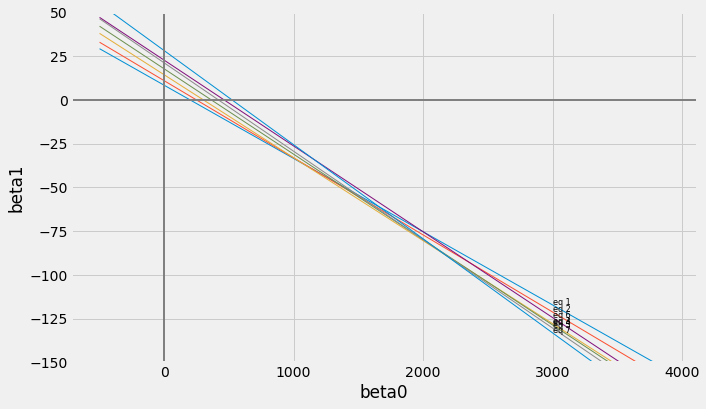

In [81]:
b0 = np.arange(-500,4000, 100)

for i in range(7):
    b1 = (price[i] - b0)/kmpl[i]
    plt.plot(b0, b1, linewidth = 1)
    plt.text(b0[-10], b1[-10], 'eq %s'% (i + 1), fontsize = 8 )

plt.axhline(0, color='grey', linewidth=2)
plt.axvline(0, color='grey', linewidth=2)

plt.xlabel('beta0')
plt.ylabel('beta1')

plt.ylim(-150,50)

Now we don't have an exact solution. But can see the $\beta_{0} $ is around [1500,1700] and $ \beta_{1} $ is around [-50,-70]. So one possible line is 

$$ price = 1600 - 60 * kmpl $$

But we can clearly see that this is probably not the best possible line!!

In [82]:
beta_0_list = widgets.IntSlider(min=1500, max=1700, step=10, value=1600)
beta_1_list = widgets.IntSlider(min=-70, max=-50, step=2, value=-60)

In [83]:
beta_0 = 1600 
beta_1 = -60

In [84]:
def plot_line(beta_0, beta_1):

    plt.scatter(kmpl, price, s = 150)
    plt.xlabel('kmpl')
    plt.ylabel('price')
    y = beta_0 + beta_1 * kmpl
    plt.plot(kmpl, y, '-')

Lets change the value of beta_0 and beta_1 and see if can find the right answer

In [85]:
interactive(plot_line, beta_0 = beta_0_list, beta_1 = beta_1_list )

interactive(children=(IntSlider(value=1600, description='beta_0', max=1700, min=1500, step=10), IntSlider(valu…

## Adding Error Term

The linear relationship hence needs to be modeled through a error variable $\epsilon_{i}$  — an unobserved random variable that adds noise to the linear relationship between the target variable and input variable.

If we have `p` input variables then,

$$ y_{i} = \beta_{0} + \sum_{i=1}^p \beta_{i} x_{i} + \epsilon_{i}  $$

We can add the $x_{0} = 1 $ in the equation:

$$ y_{i} = \sum_{i=0}^p \beta_{i} x_{i} + \epsilon_{i} $$

$$ y_{i} = x_{i}^T \beta_{i} + \epsilon_{i} $$




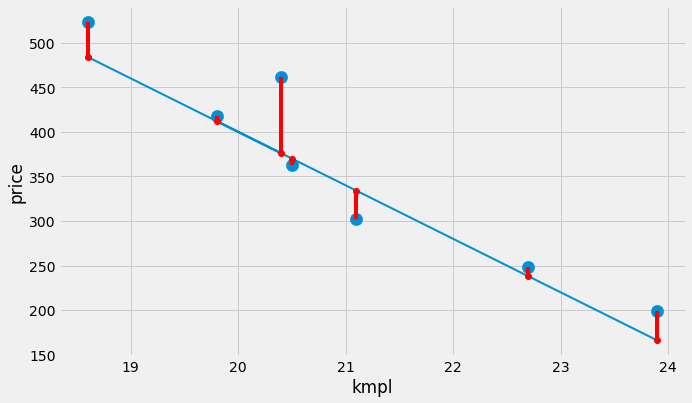

In [86]:
plt.scatter(kmpl, price, s = 150)
plt.xlabel('kmpl')
plt.ylabel('price')
y = 1600 - 60 * kmpl
yerrL = y - price
yerrB = y - y
plt.errorbar(kmpl,y, fmt = 'o', yerr= [yerrL, yerrB], c= 'r')
plt.plot(kmpl, y,linewidth = 2)

## Represent Matrix Way

If we write this in matrix form 

$$ y = X\beta + \epsilon $$

$$ \text{where} ~~~~  X = \begin{bmatrix} - x_{1}^T- \\ - x_{2}^T- \\ ... \\ - x_{n}^T-  \end{bmatrix} ~~ \text{,} ~~ y = \begin{bmatrix} y_{1} \\ y_{2} \\ ... \\ y_{n} \end{bmatrix} ~~ \text{and} ~~ \epsilon = \begin{bmatrix} \epsilon_{1} \\ \epsilon_{2} \\ ... \\ \epsilon_{n} \end{bmatrix} $$

For our specific example, the matrix looks like:

$$ \begin{bmatrix}199 \\ 248 \\ 302 \\ 363 \\ 418 \\ 462 \\ 523 \end{bmatrix} = \begin{bmatrix} 1 & 23.9 \\ 1 & 22.7 \\ 1 & 21.1 \\ 1 & 20.5 \\ 1 & 19.8 \\ 1 & 20.4 \\ 1 & 18.6  \end{bmatrix}  \begin{bmatrix}
\beta_{0} \\ \beta_{1} \end{bmatrix} +  \begin{bmatrix} \epsilon_{1} \\ \epsilon_{2} \\ \epsilon_{3} \\ \epsilon_{4} \\ \epsilon_{5} \\ \epsilon_{6} \\ \epsilon_{7}  \end{bmatrix} $$



## Minimize Error - Ordinary Least Square


The error we will aim to minimize is the squared error:

$$ E(\beta)= \frac {1}{n} \sum _{i=1}^{n}(\epsilon_{i})^2 $$

This is why this technique is called **Ordinary Least Square** (OLS) regression

$$ E(\beta)= \frac {1}{n} \sum _{i=1}^{n}(y_{i}-x_{i}^{T}\beta)^{2}  $$

which in matrix way is equal to: 

$$ E(\beta)=  \frac {1}{n} (y-X\beta)^{T}(y-X\beta) $$

$$ E(\beta)=   \frac {1}{n} ((y^{T} - \beta^{T}X^{T})(y-X\beta)) $$

$$ E(\beta)=   \frac {1}{n} (y^{T}y - \beta^{T}X^{T}y - y^{T}X\beta - \beta^{T}X^{T}X\beta) $$

Now, $ y^{T}X\beta = {\beta^{T}X^{T}y}^T $ and is a scalar matrix of $1 x 1$, which means it is equal to its transpose and hence  $ y^{T}X\beta = \beta^{T}X^{T}y $

$$ E(\beta)=   \frac {1}{n} (y^{T}y - 2\beta^{T}X^{T}y + \beta^{T}X^{T}X\beta) $$


To get the minimum for this error function, we need to differentiate by $\beta^T$

$$ \nabla E(\beta) = 0 $$

$$ \nabla E(\beta) ={\frac {dE(\beta)}{d\beta^T}} =  {\frac {d}{d\beta^T}}{\bigg (}{ \frac {1}{n} ||y - X\beta||}^2{\bigg )} = 0 $$

$$ {\frac {d}{d\beta^T}}{\bigg (}{ y^{T}y - 2\beta^{T}X^{T}y + \beta^{T}X^{T}X\beta}{\bigg )} = 0 $$

$$ - 2 X^Ty + 2X^{T}X\beta = 0 $$

$$ X^T X\beta = X^T y $$

So the solution to OLS:

$$ \beta = X^†y ~~ \text{where} ~~ X^† = (X^T X)^{−1} X^T $$

$$X^† ~~ \text{is the pseudo inverse of} ~~ X $$





## Calculate Pseudo Inverse

$$ X^† = (X^T X)^{−1} X^T $$

$X^† $ is the pseudo inverse of $ X $ has good properties

$$ X^† = \left( \begin{matrix} ~ \\
                            \begin{bmatrix}  ~ \\ p + 1 \times n \\ ~  \end{bmatrix} 
                            \begin{bmatrix}  ~ \\ n \times p + 1 \\ ~  \end{bmatrix} 
                             \\ ~ 
                  \end{matrix}
          \right)^{-1} 
          \begin{bmatrix} ~ \\  (p + 1 \times n) \\ ~ \end{bmatrix}$$

$$ X^† = \left( \begin{matrix} ~ \\
                            \begin{bmatrix}  ~ \\ p + 1 \times p + 1 \\ ~  \end{bmatrix} 
                             \\ ~ 
                  \end{matrix}
          \right)^{-1} 
          \begin{bmatrix} ~ \\  (p + 1 \times n) \\ ~ \end{bmatrix}$$


$$ X^† = \begin{bmatrix} ~ \\  (p + 1 \times n) \\ ~ \end{bmatrix}$$


$$ X^†_{p + 1 \times n} = {(X^T_{p + 1 \times n} ~ X_{n \times p+1})}^{-1} ~ X^T_{p + 1 \times n}$$



In [87]:
n = 7

In [88]:
x0 = np.ones(n)
x0

array([1., 1., 1., 1., 1., 1., 1.])

In [89]:
x1 = kmpl
x1

array([23.9, 22.7, 21.1, 20.5, 19.8, 20.4, 18.6])

In [90]:
# Create the X matrix
X = np.c_[x0, x1]
X = np.asmatrix(X)
X

matrix([[ 1. , 23.9],
        [ 1. , 22.7],
        [ 1. , 21.1],
        [ 1. , 20.5],
        [ 1. , 19.8],
        [ 1. , 20.4],
        [ 1. , 18.6]])

In [91]:
# Create the y matrix
y = np.asmatrix(price.reshape(-1,1))
y

matrix([[199],
        [248],
        [302],
        [363],
        [418],
        [462],
        [523]])

In [92]:
y.shape

(7, 1)

In [93]:
X_T = np.transpose(X)
X_T

matrix([[ 1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ],
        [23.9, 22.7, 21.1, 20.5, 19.8, 20.4, 18.6]])

In [94]:
X_T * X

matrix([[   7.  ,  147.  ],
        [ 147.  , 3106.12]])

In [95]:
X_pseudo = np.linalg.inv(X_T * X) * X_T
X_pseudo

matrix([[-3.0422893 , -1.72429767,  0.03302451,  0.69202032,  1.46084877,
          0.80185296,  2.77884041],
        [ 0.15167364,  0.08891213,  0.00523013, -0.02615063, -0.06276151,
         -0.03138075, -0.12552301]])

In [96]:
beta = X_pseudo * y
beta

matrix([[1662.55977286],
        [ -62.06066946]])

## OLS Solution

Hence we now know that the best-fit line is $\beta_0 = 1662 $ and $\beta_1 = -62$

$$ price = 1662 - 62 * kmpl $$



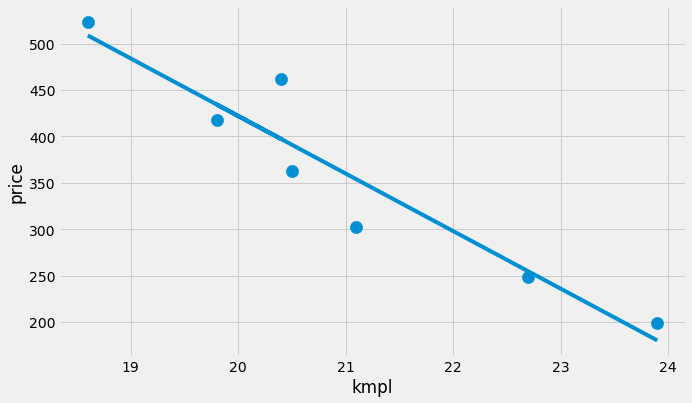

In [97]:
beta_0 = 1662 
beta_1 = -62
plt.scatter(kmpl, price, s = 150)
plt.xlabel('kmpl')
plt.ylabel('price')
y = beta_0 + beta_1 * kmpl
plt.plot(kmpl, y, '-')

## Exercise 1

We had price ('000 INR), mileage (kmpl) and now we have one more input variable - horsepower (bhp) for the 7 cars

```
price = [199 , 248 , 302 , 363 , 418 , 462 , 523 ]
kmpl  = [23.9, 22.7, 21.1, 20.5, 19.8, 20.4, 18.6]
bhp   = [38  , 47  , 55  , 67  , 68  , 83  , 82  ] 
```
We want to predict the value of `price`, given the variable `kmpl` and `bhp`

In [98]:
bhp = np.array([38, 47, 55, 67, 68, 83, 82])

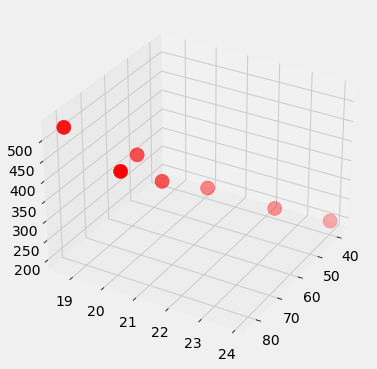

In [99]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(bhp, kmpl, price, c='r', marker='o', s = 200)
ax.view_init(azim=30)

So a linear relationship can be written as:

$$ price = \beta_{0} + \beta_{1} kmpl + \beta_{2} bhp $$

We have added an intercept to the equation, so that the plane does not need to pass through zero

So we are trying to solve these n = 7 equations with, p = 3

$$ 199 = \beta_{0} + \beta_{1} 23.9 + \beta_{2} 38 + \epsilon_{1} ~~~~ \text{(eq 1)} $$
$$ 248 = \beta_{0} + \beta_{1} 22.7 + \beta_{2} 47 + \epsilon_{2} ~~~~ \text{(eq 2)} $$
$$ 302 = \beta_{0} + \beta_{1} 21.1 + \beta_{2} 55 + \epsilon_{3} ~~~~ \text{(eq 3)} $$
$$ 363 = \beta_{0} + \beta_{1} 20.5 + \beta_{2} 67 + \epsilon_{4} ~~~~ \text{(eq 4)} $$
$$ 418 = \beta_{0} + \beta_{1} 19.8 + \beta_{2} 68 + \epsilon_{5} ~~~~ \text{(eq 5)} $$
$$ 462 = \beta_{0} + \beta_{1} 20.4 + \beta_{2} 83 + \epsilon_{6} ~~~~ \text{(eq 6)} $$
$$ 523 = \beta_{0} + \beta_{1} 18.6 + \beta_{2} 82 + \epsilon_{7} ~~~~ \text{(eq 7)} $$

or in matrix form - we can write it as

$$ \begin{bmatrix}199 \\ 248 \\ 302 \\ 363 \\ 418 \\ 462 \\ 523 \end{bmatrix} = \begin{bmatrix} 1 & 23.9 & 38 \\ 1 & 22.7 & 47 \\ 1 & 21.1 & 55 \\ 1 & 20.5 & 67 \\ 1 & 19.8 & 68 \\ 1 & 20.4 & 83 \\ 1 & 18.6 & 82  \end{bmatrix}  \begin{bmatrix}\beta_{0} \\ \beta_{1} \\ \beta_{2}\end{bmatrix} + \begin{bmatrix} \epsilon_{1} \\ \epsilon_{2} \\ \epsilon_{3} \\ \epsilon_{4} \\ \epsilon_{5} \\ \epsilon_{6} \\ \epsilon_{7}  \end{bmatrix}$$



Develop the $X$ matrix for this problem?

In [100]:
n = 7

x0 = np.ones(n)

x1 = np.array([23.9, 22.7, 21.1, 20.5, 19.8, 20.4, 18.6])

x2 = np.array([38, 47, 55, 67, 68, 83, 82])

X = np.c_[x0, x1, x2]
X = np.asmatrix(X)
X

matrix([[ 1. , 23.9, 38. ],
        [ 1. , 22.7, 47. ],
        [ 1. , 21.1, 55. ],
        [ 1. , 20.5, 67. ],
        [ 1. , 19.8, 68. ],
        [ 1. , 20.4, 83. ],
        [ 1. , 18.6, 82. ]])

Develop the $y$ matrix for this problem?

In [101]:
# Create the y matrix
price2 = np.array([199, 248, 302, 363, 418, 462, 523])
y = np.asmatrix(price2.reshape(-1,1))
y

matrix([[199],
        [248],
        [302],
        [363],
        [418],
        [462],
        [523]])

In [102]:
y.shape

(7, 1)

Calculate the pseudo inverse of $X$.

In [103]:
X_T = np.transpose(X)
X_T

matrix([[ 1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ],
        [23.9, 22.7, 21.1, 20.5, 19.8, 20.4, 18.6],
        [38. , 47. , 55. , 67. , 68. , 83. , 82. ]])

In [104]:
X_T * X

matrix([[7.00000e+00, 1.47000e+02, 4.40000e+02],
        [1.47000e+02, 3.10612e+03, 9.07390e+03],
        [4.40000e+02, 9.07390e+03, 2.94040e+04]])

In [105]:
X_pseudo = np.linalg.inv(X_T * X) * X_T
X_pseudo

matrix([[-3.31335942e+00, -8.45475673e-01,  5.67351430e+00,
          8.54059347e-01,  5.72391640e+00, -1.12488572e+01,
          4.15620227e+00],
        [ 1.61273946e-01,  5.77874949e-02, -1.94535253e-01,
         -3.18894532e-02, -2.13743663e-01,  3.95411026e-01,
         -1.74304098e-01],
        [ 1.10510440e-03, -3.58280010e-03, -2.29952681e-02,
         -6.60604122e-04, -1.73797643e-02,  4.91285901e-02,
         -5.61525796e-03]])

Find the $\beta$ for the best-fit plane.

In [106]:
beta = X_pseudo * y
beta

matrix([[523.70717536],
        [-21.72670412],
        [  4.64289836]])

Plot the `price`, `kmpl` and `bhp` and the best-fit plane.

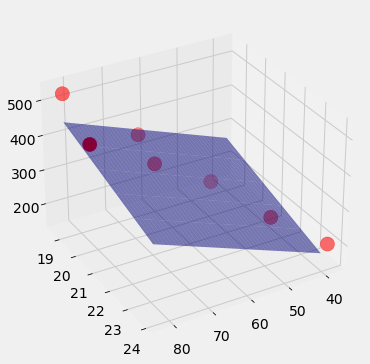

In [107]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(bhp, kmpl, price, c='r', marker='o', s = 200)

xrange = np.arange(min(bhp), max(bhp), 1)
yrange = np.arange(min(kmpl), max(kmpl), 1)
x, y = np.meshgrid(xrange, yrange)
z = 524 - 22 * y + 4 * x
ax.plot_surface(x, y, z, color ='blue', alpha = 0.5)
ax.view_init(azim=60)

## Using a package: sklearn

Run the Ordinary Least Square using the package sklearn

In [108]:
import pandas as pd
df = pd.read_csv("data/cars_sample.csv")

In [109]:
from sklearn import linear_model

In [110]:
y = df.price

In [111]:
X = df[['kmpl', 'bhp']]

In [112]:
model_sklearn = linear_model.LinearRegression()

In [113]:
model_sklearn.fit(X, y)

LinearRegression()

In [114]:
model_sklearn.coef_

array([-21.72670412,   4.64289836])

In [115]:
model_sklearn.intercept_

523.7071753605244

In [116]:
model_sklearn_norm = linear_model.LinearRegression(normalize = True)

In [117]:
model_sklearn_norm.fit(X, y)

LinearRegression(normalize=True)

In [118]:
model_sklearn_norm.coef_

array([-21.72670412,   4.64289836])

In [119]:
model_sklearn_norm.intercept_

523.7071753605242

## Non Linear Transformation

What happens when we do Non-Linear transforms to the features?

What if we want to predict $price$ based on $kmpl$, $bhp$, $kmpl^2$ and $bhp / kmpl$

The think to remember is that non-linear transforms of the features does not impact the Linear Regression. Because the linear relationship is really about $\beta $ and not the features.

We can be write this  as:

$$ price = \beta_{0} + \beta_{1} kmpl + \beta_{2} bhp + \beta_{3} kmpl^2 + \beta_{4} bhp/kmpl $$

In [120]:
df['kmpl2'] = np.power(df.kmpl,2)

Text(0, 0.5, 'price')

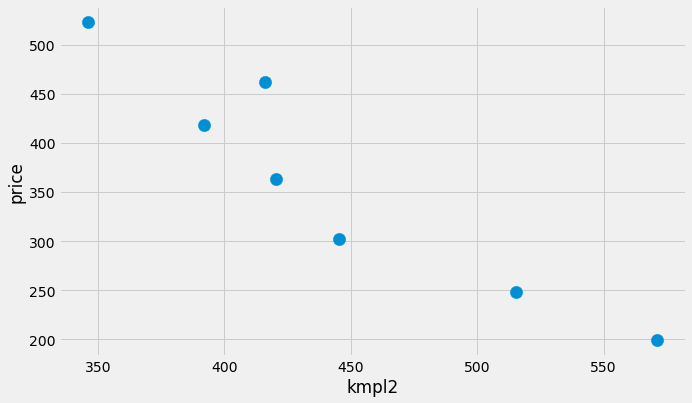

In [121]:
plt.scatter(df.kmpl2, df.price, s = 150)
plt.xlabel('kmpl2')
plt.ylabel('price')

In [122]:
df['bhp_kmpl'] = np.divide(df.bhp, df.kmpl)

Text(0, 0.5, 'price')

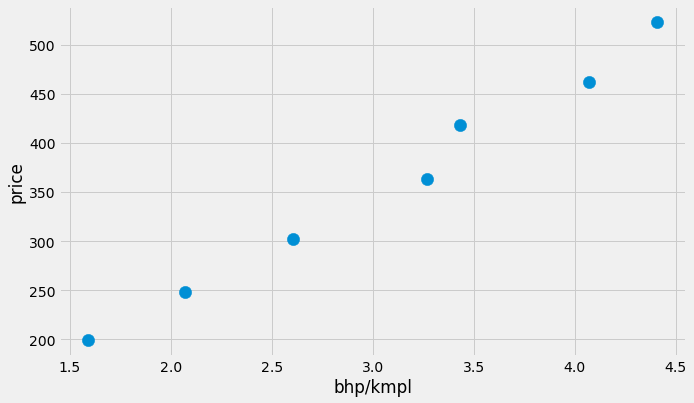

In [123]:
plt.scatter(df.bhp_kmpl, df.price, s = 150)
plt.xlabel('bhp/kmpl')
plt.ylabel('price')

In [124]:
df

,brand,model,price,kmpl,bhp,type,kmpl2,bhp_kmpl
0,Tata,Nano,199,23.9,38,Hatchback,571.21,1.589958
1,Suzuki,Alto 800,248,22.7,47,Hatchback,515.29,2.070485
2,Hyundai,EON,302,21.1,55,Hatchback,445.21,2.606635
3,Suzuki,Wagon-R,363,20.5,67,Hatchback,420.25,3.268293
4,Hyundai,i10,418,19.8,68,Hatchback,392.04,3.434343
5,Suzuki,Swift,462,20.4,83,Hatchback,416.16,4.068627
6,Hyundai,i20,523,18.6,82,Hatchback,345.96,4.408602


## Exercise 2

Run a linear regeression:
$$ price = \beta_{0} + \beta_{1} kmpl + \beta_{2} bhp + \beta_{3} kmpl^2 + \beta_{4} bhp/kmpl $$

Using Pseudo-Inverse Matrix:

In [125]:
n = 7

x0 = np.ones(n)

x1 = np.array([23.9, 22.7, 21.1, 20.5, 19.8, 20.4, 18.6])

x2 = np.array([38, 47, 55, 67, 68, 83, 82])

x3 = x1**2

x4 = x2 / x1

X = np.c_[x0, x1, x2, x3, x4]
X = np.asmatrix(X)
X

matrix([[  1.        ,  23.9       ,  38.        , 571.21      ,
           1.58995816],
        [  1.        ,  22.7       ,  47.        , 515.29      ,
           2.07048458],
        [  1.        ,  21.1       ,  55.        , 445.21      ,
           2.60663507],
        [  1.        ,  20.5       ,  67.        , 420.25      ,
           3.26829268],
        [  1.        ,  19.8       ,  68.        , 392.04      ,
           3.43434343],
        [  1.        ,  20.4       ,  83.        , 416.16      ,
           4.06862745],
        [  1.        ,  18.6       ,  82.        , 345.96      ,
           4.40860215]])

In [126]:
# Create the y matrix
y = np.asmatrix(price.reshape(-1,1))
y

matrix([[199],
        [248],
        [302],
        [363],
        [418],
        [462],
        [523]])

In [127]:
y.shape

(7, 1)

In [128]:
X_T = np.transpose(X)
X_T

matrix([[  1.        ,   1.        ,   1.        ,   1.        ,
           1.        ,   1.        ,   1.        ],
        [ 23.9       ,  22.7       ,  21.1       ,  20.5       ,
          19.8       ,  20.4       ,  18.6       ],
        [ 38.        ,  47.        ,  55.        ,  67.        ,
          68.        ,  83.        ,  82.        ],
        [571.21      , 515.29      , 445.21      , 420.25      ,
         392.04      , 416.16      , 345.96      ],
        [  1.58995816,   2.07048458,   2.60663507,   3.26829268,
           3.43434343,   4.06862745,   4.40860215]])

In [129]:
X_T * X

matrix([[7.00000000e+00, 1.47000000e+02, 4.40000000e+02, 3.10612000e+03,
         2.14469435e+01],
        [1.47000000e+02, 3.10612000e+03, 9.07390000e+03, 6.60449700e+04,
         4.40000000e+02],
        [4.40000000e+02, 9.07390000e+03, 2.94040000e+04, 1.88136630e+05,
         1.45280853e+03],
        [3.10612000e+03, 6.60449700e+04, 1.88136630e+05, 1.41319948e+06,
         9.07390000e+03],
        [2.14469435e+01, 4.40000000e+02, 1.45280853e+03, 9.07390000e+03,
         7.20753739e+01]])

In [130]:
X_pseudo = np.linalg.inv(X_T * X) * X_T
X_pseudo

matrix([[ 2.23370369e+02, -3.18820298e+02, -2.61086875e+02,
          1.38368371e+02,  4.54156790e+02, -2.80392203e+01,
         -2.06949136e+02],
        [-1.95743144e+01,  2.74023248e+01,  2.29276463e+01,
         -1.16396131e+01, -3.85941036e+01,  1.94633781e+00,
          1.75317222e+01],
        [ 6.95765595e-01, -1.09594078e+00, -8.76147521e-01,
          5.47563084e-01,  1.58681813e+00,  2.86759588e-02,
         -8.86734472e-01],
        [ 4.22817782e-01, -5.77515308e-01, -4.92856392e-01,
          2.39741713e-01,  8.06045481e-01, -3.54135193e-02,
         -3.62819757e-01],
        [-1.42037953e+01,  2.24109384e+01,  1.74672969e+01,
         -1.12906420e+01, -3.29482037e+01,  3.98383244e-01,
          1.81660225e+01]])

In [131]:
beta = X_pseudo * y
beta

matrix([[5411.77209151],
        [-464.57892074],
        [  13.60903277],
        [   9.91178599],
        [-179.48825272]])

## Using sklearn package:

Run the Ordinary Least Square using the package sklearn

In [132]:
df

,brand,model,price,kmpl,bhp,type,kmpl2,bhp_kmpl
0,Tata,Nano,199,23.9,38,Hatchback,571.21,1.589958
1,Suzuki,Alto 800,248,22.7,47,Hatchback,515.29,2.070485
2,Hyundai,EON,302,21.1,55,Hatchback,445.21,2.606635
3,Suzuki,Wagon-R,363,20.5,67,Hatchback,420.25,3.268293
4,Hyundai,i10,418,19.8,68,Hatchback,392.04,3.434343
5,Suzuki,Swift,462,20.4,83,Hatchback,416.16,4.068627
6,Hyundai,i20,523,18.6,82,Hatchback,345.96,4.408602


In [133]:
y = df.price

In [135]:
X = df[['kmpl', 'bhp','kmpl2', 'bhp_kmpl']]

In [136]:
model_sklearn = linear_model.LinearRegression()

In [137]:
model_sklearn.fit(X, y)

LinearRegression()

In [138]:
model_sklearn.coef_

array([-464.57892149,   13.60903281,    9.91178601, -179.4882534 ])

In [139]:
model_sklearn.intercept_

5411.772099516868

In [140]:
model_sklearn_norm = linear_model.LinearRegression(normalize = True)

In [141]:
model_sklearn_norm.fit(X, y)

LinearRegression(normalize=True)

In [142]:
model_sklearn_norm.coef_

array([-464.57892149,   13.60903281,    9.91178601, -179.4882534 ])

In [143]:
model_sklearn_norm.intercept_

5411.772099517066